# <p style="text-align: center;"> Final Project - Programming for Data Science</p>
### <p style="text-align: center;"> <b> Question 1: What makes song popular? </b></p>


---

## Member Information
| Name              | ID       |
|-------------------|----------|
| Nguyen Khanh Nhan | 21127657         |
| Tran Dai Nien     | 21127664 |

## Table of contents
1. [Question](#1-question) <br> 
    1.1 [The purpose of the question](#11-the-purpose-of-the-question)<br>
    1.2 [How to solve the question](#12-how-to-solve-the-question)
2. [Solution](#2-solution) <br>
    2.1 [Pre-processing data](#21-pre-processing-data)<br>
    2.2 [Data analysis](#22-data-analysis)<br>
    2.3 [Answer the question](#23-answer-the-question)<br>
---

## 1. Question

What makes song popular?

### 1.1 The purpose of the question

 There are numerous factors that can contribute to the creation of a good song that attracts millions of listeners. As producers or singers, if we are aware of these factors, they can be incredibly helpful in improving our approach to composing a song and the methods we use to do so.

### 1.2 How to solve the question

1. Factors(Attributes) from the most popular song of each year

2. Factors(Attributes) from the phases when the changing rate of streams was remarkable

3. Factors(Attributes) from the year which the average streams are the highest

## 2. Solution

### 2.0 Preparation

**📚 Import libraries**

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**📊 Get data**

In [96]:
df.shape

(953, 24)

In [97]:
df = pd.read_csv('./data/processed_spotify-2023.csv', encoding='ISO-8859-1')
df.head().T

,0,1,2,3,4
track_name,Seven (feat. Latto) (Explicit Ver.),LALA,vampire,Cruel Summer,WHERE SHE GOES
artist(s)_name,"Latto, Jung Kook",Myke Towers,Olivia Rodrigo,Taylor Swift,Bad Bunny
artist_count,2,1,1,1,1
released_year,2023,2023,2023,2019,2023
released_month,7,3,6,8,5
released_day,14,23,30,23,18
in_spotify_playlists,553,1474,1397,7858,3133
in_spotify_charts,147.0,48.0,113.0,100.0,50.0
streams,141381703.0,133716286.0,140003974.0,800840817.0,303236322.0
in_apple_playlists,43,48,94,116,84


### 2.1 Pre-processing data

### 2.2 Data analysis

- Get number of songs throughout year

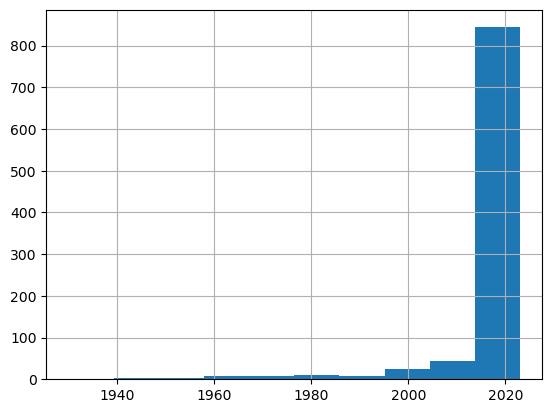

In [98]:
df['released_year'].hist();

🤔 In 21th century, people tend to hear music more. We can see the number of songs after 2000 increase significantly, indicating that music more and more comes closer to people's life and improve their life in positive ways. 

- **Most popular songs from 1930 to 2023**

In [163]:
released_years = sorted(list(df['released_year'].value_counts().index))
best_songs = {}

for year in released_years:
  songs = df[df['released_year'] == year]
  songs = songs.sort_values(by=['streams'], ascending=False)
  best_song = songs.iloc[0]
  best_songs[year] = best_song

best_songs_df = pd.DataFrame(best_songs)

best_songs_df.T[['track_name', 'streams']].sort_index(ascending=False)

,track_name,streams
2023,Flowers,1316855716.0
2022,As It Was,2513188493.0
2021,STAY (with Justin Bieber),2665343922.0
2020,Heat Waves,2557975762.0
2019,Blinding Lights,3703895074.0
2018,Someone You Loved,2887241814.0
2017,Shape of You,3562543890.0
2016,One Dance,2713922350.0
2015,Love Yourself,2123309722.0
2014,Thinking Out Loud,2280566092.0


- **Most popular songs of each year and their corresponding streams**

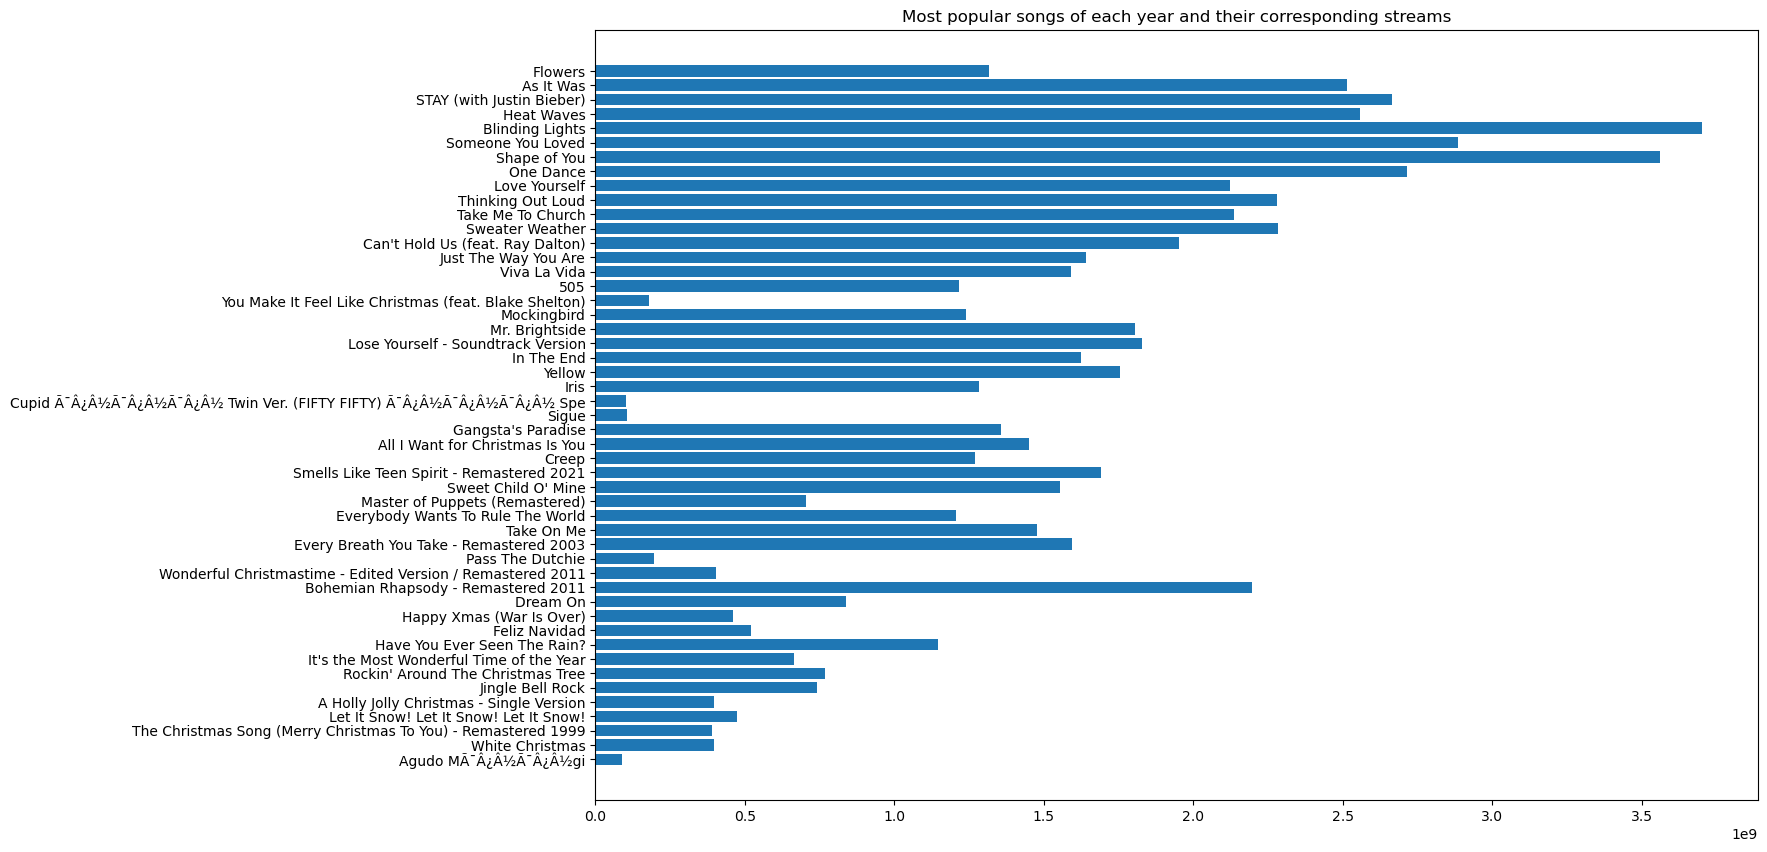

In [198]:
best_songs_name, best_songs_streams = best_songs_df.T['track_name'], best_songs_df.T['streams']
plt.figure(figsize=(15, 10))
plt.title('Most popular songs of each year and their corresponding streams')
plt.barh(best_songs_name, best_songs_streams);

- **Lowest/highest streams and corresponding year**

In [119]:
best_songs_streams[best_songs_streams == best_songs_streams.values.min()]

1930    90598517.0
Name: streams, dtype: object

In [121]:
best_songs_streams[best_songs_streams == best_songs_streams.values.max()]

2019    3703895074.0
Name: streams, dtype: object

- **The changing rate of streams of most popular songs in each year**

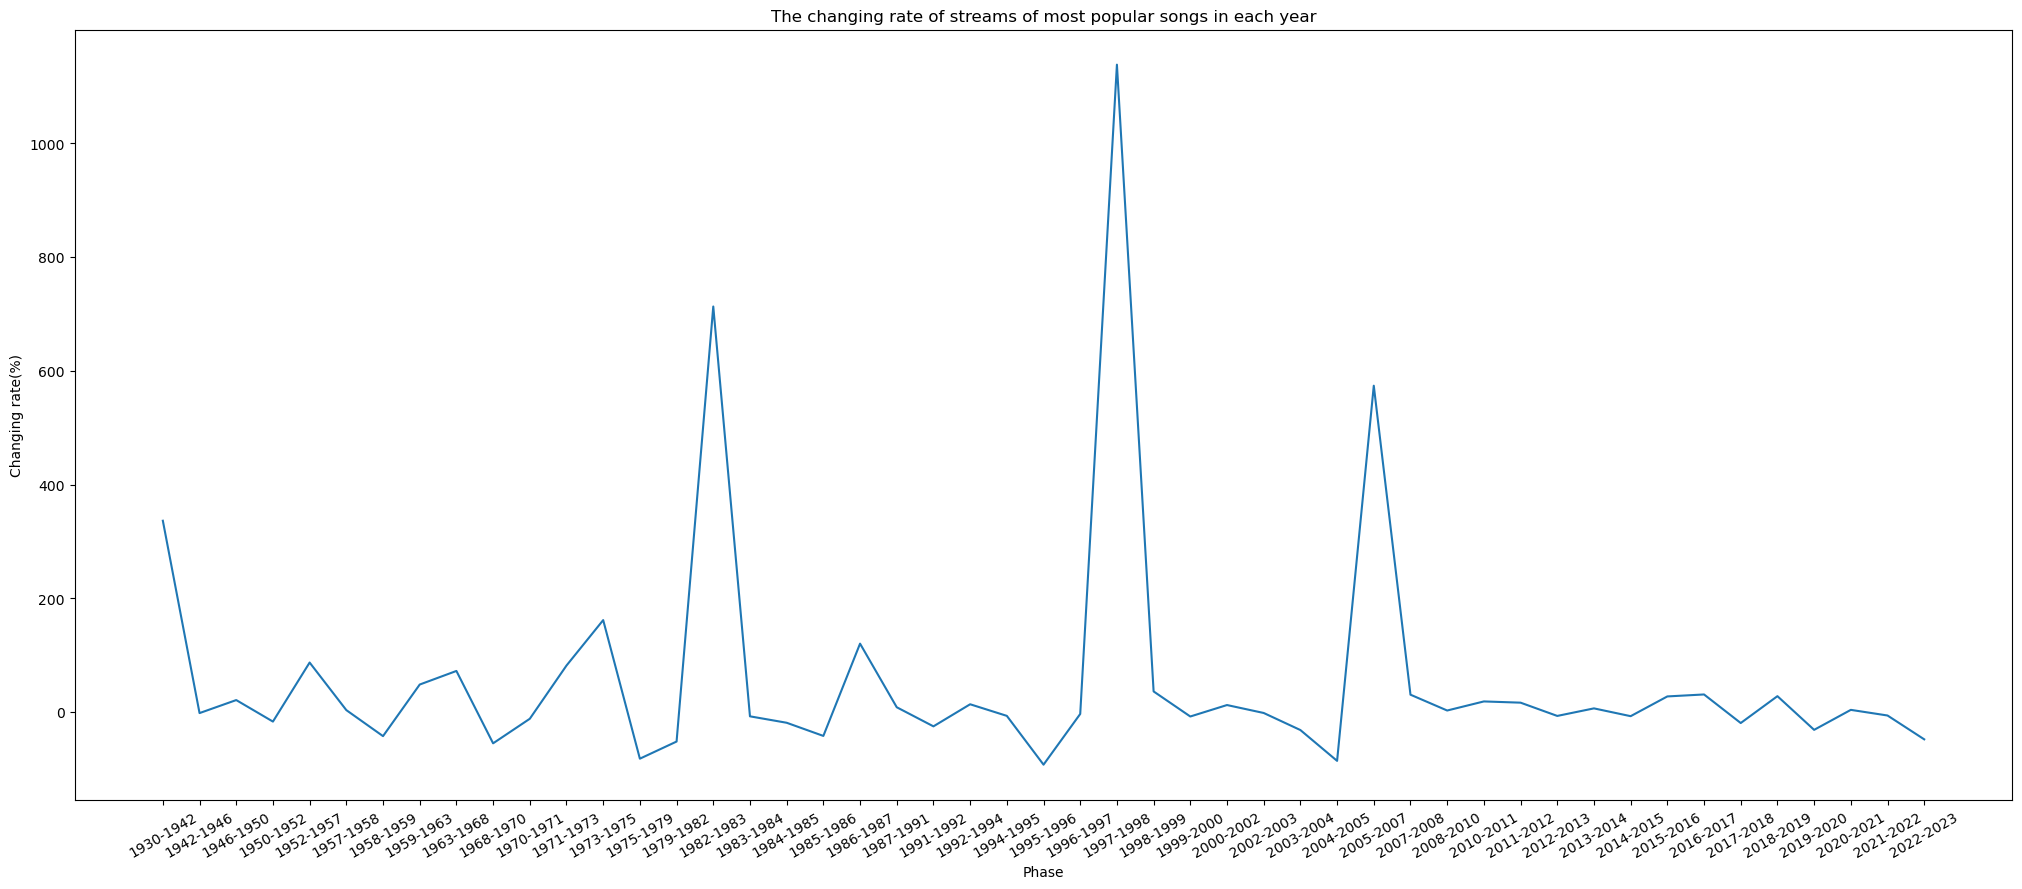

In [197]:
first = True
last_stream, last_year = None, None
changing_rate_df = {}

for year, stream in best_songs_streams.items():
  if first:
    first = False
    last_stream = stream
    last_year = year
    continue
  changing_rate_df[str(last_year) + '-' + str(year)] = (stream - last_stream) / last_stream * 100
  
  last_stream = stream
  last_year = year

changing_rate_df

plt.figure(figsize=(25, 10))
plt.xticks(rotation=30)
plt.ylabel('Changing rate(%)')
plt.xlabel('Phase')
plt.title('The changing rate of streams of most popular songs in each year')
plt.plot(changing_rate_df.keys(), changing_rate_df.values());

**Comments**:

- There 3 noticeable phases: **1982-1983, 1997-1998 and 2005-2007**



**The average streams of each years**

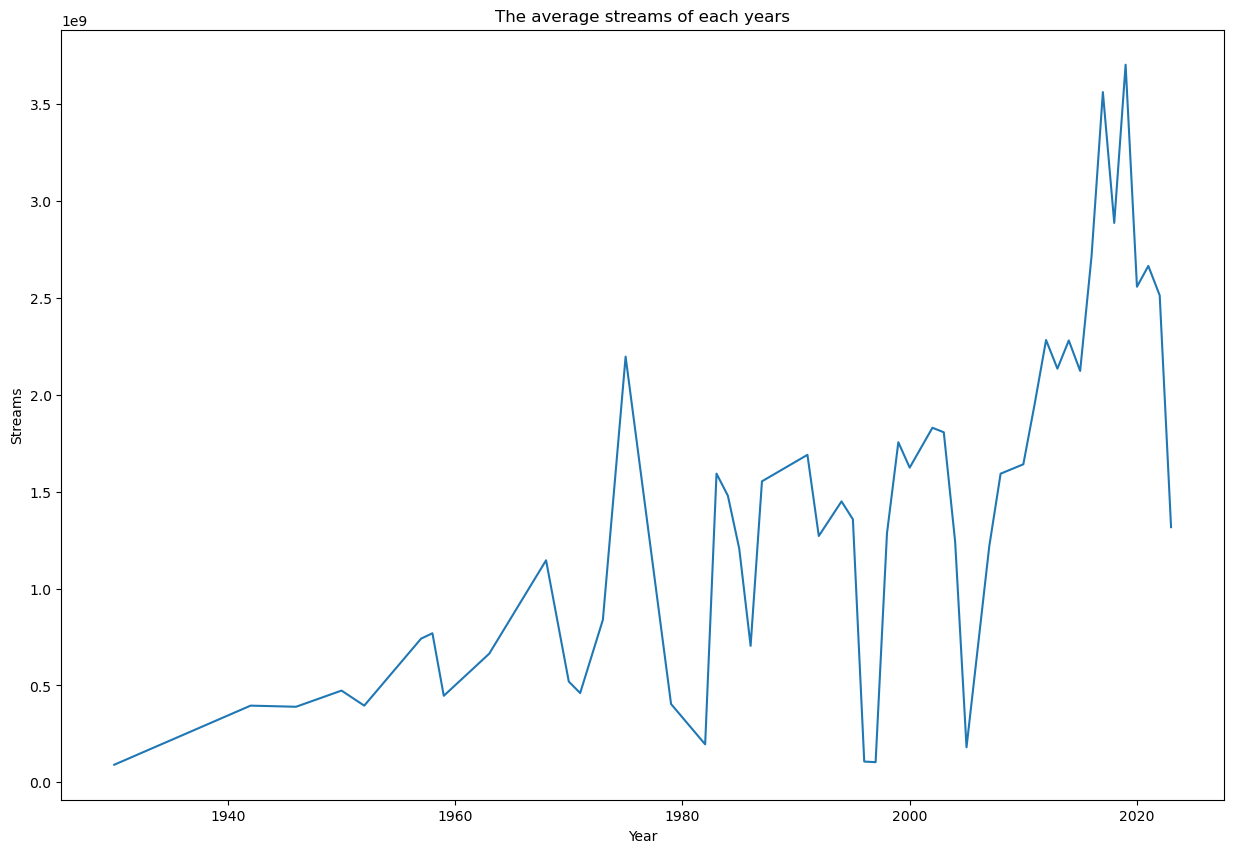

In [196]:
avg_stream_df = best_songs_df.T[['streams', 'released_year']].groupby(['released_year']).mean()

plt.figure(figsize=(15, 10))
plt.title('The average streams of each years')
plt.xlabel('Year')
plt.ylabel('Streams')
plt.plot(avg_stream_df.index, avg_stream_df.values);

**Comments**

- The chart tend to go up(some year it went down remarkably). Therefore, people expose to music more especially when we have some modern devices that help us access music more easily.

📝 **Some insights**
- Some songs which is the most popular song in a year but its streams are very low(You Make It Fell Like Christmas, Cupid or Sigue,...)
- The streams is changing rapidly. Therefore, in some years, people tend to listen to music more than other years.
- The highest streams are 3703895074.0 in 2019: [Blinding Lights - The Weeknd](https://www.google.com/search?q=blinding+lights&rlz=1C1KNTJ_viVN977VN977&oq=blinding+lights&gs_lcrp=EgZjaHJvbWUyBggAEEUYOTINCAEQABiDARixAxiABDINCAIQLhivARjHARiABDIHCAMQABiABDIHCAQQABiABDIHCAUQABiABDINCAYQLhivARjHARiABDIHCAcQABiABDIHCAgQABiABDINCAkQLhivARjHARiABNIBCDE1OTZqMGo0qAIAsAIA&sourceid=chrome&ie=UTF-8)
- The the lowest streams are 90598517.0 in 1930: Agudo...

### 2.3 Answer the question